<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [20]</a>'.</span>

## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.037906
0:	learn: 0.9485917	total: 50.4ms	remaining: 50.4s
1:	learn: 0.9171489	total: 50.9ms	remaining: 25.4s
2:	learn: 0.8902925	total: 51.7ms	remaining: 17.2s
3:	learn: 0.8608175	total: 52.3ms	remaining: 13s
4:	learn: 0.8363723	total: 52.6ms	remaining: 10.5s
5:	learn: 0.8089501	total: 53ms	remaining: 8.79s
6:	learn: 0.7867922	total: 53.2ms	remaining: 7.55s
7:	learn: 0.7643219	total: 53.6ms	remaining: 6.65s
8:	learn: 0.7392990	total: 54ms	remaining: 5.94s
9:	learn: 0.7175135	total: 54.3ms	remaining: 5.38s
10:	learn: 0.6950437	total: 54.8ms	remaining: 4.93s
11:	learn: 0.6727465	total: 55.1ms	remaining: 4.54s
12:	learn: 0.6547676	total: 55.5ms	remaining: 4.21s
13:	learn: 0.6354600	total: 56.3ms	remaining: 3.96s
14:	learn: 0.6156664	total: 56.5ms	remaining: 3.71s
15:	learn: 0.5977832	total: 57.6ms	remaining: 3.54s
16:	learn: 0.5792455	total: 58.1ms	remaining: 3.36s
17:	learn: 0.5627508	total: 58.4ms	remaining: 3.19s
18:	learn: 0.5464320	total: 58.8ms	remaining: 3.04

164:	learn: 0.0473240	total: 147ms	remaining: 744ms
165:	learn: 0.0470418	total: 148ms	remaining: 742ms
166:	learn: 0.0468433	total: 148ms	remaining: 738ms
167:	learn: 0.0466467	total: 149ms	remaining: 736ms
168:	learn: 0.0464630	total: 149ms	remaining: 732ms
169:	learn: 0.0462612	total: 149ms	remaining: 728ms
170:	learn: 0.0461024	total: 149ms	remaining: 724ms
171:	learn: 0.0459161	total: 150ms	remaining: 721ms
172:	learn: 0.0457120	total: 150ms	remaining: 719ms
173:	learn: 0.0455781	total: 151ms	remaining: 717ms
174:	learn: 0.0452696	total: 152ms	remaining: 716ms
175:	learn: 0.0451090	total: 152ms	remaining: 713ms
176:	learn: 0.0449529	total: 153ms	remaining: 711ms
177:	learn: 0.0447500	total: 153ms	remaining: 708ms
178:	learn: 0.0446143	total: 154ms	remaining: 706ms
179:	learn: 0.0444584	total: 154ms	remaining: 703ms
180:	learn: 0.0442770	total: 155ms	remaining: 701ms
181:	learn: 0.0441293	total: 155ms	remaining: 698ms
182:	learn: 0.0439215	total: 156ms	remaining: 696ms
183:	learn: 

376:	learn: 0.0266760	total: 290ms	remaining: 479ms
377:	learn: 0.0266182	total: 292ms	remaining: 481ms
378:	learn: 0.0265521	total: 294ms	remaining: 481ms
379:	learn: 0.0264907	total: 296ms	remaining: 482ms
380:	learn: 0.0264444	total: 296ms	remaining: 481ms
381:	learn: 0.0263969	total: 299ms	remaining: 483ms
382:	learn: 0.0263473	total: 300ms	remaining: 483ms
383:	learn: 0.0263184	total: 301ms	remaining: 482ms
384:	learn: 0.0262889	total: 302ms	remaining: 482ms
385:	learn: 0.0262448	total: 303ms	remaining: 481ms
386:	learn: 0.0261879	total: 303ms	remaining: 481ms
387:	learn: 0.0261142	total: 306ms	remaining: 482ms
388:	learn: 0.0260943	total: 307ms	remaining: 482ms
389:	learn: 0.0260465	total: 309ms	remaining: 483ms
390:	learn: 0.0259956	total: 309ms	remaining: 481ms
391:	learn: 0.0259487	total: 311ms	remaining: 482ms
392:	learn: 0.0259326	total: 313ms	remaining: 483ms
393:	learn: 0.0258556	total: 314ms	remaining: 483ms
394:	learn: 0.0257958	total: 317ms	remaining: 485ms
395:	learn: 

459:	learn: 0.0234000	total: 427ms	remaining: 502ms
460:	learn: 0.0233726	total: 428ms	remaining: 500ms
461:	learn: 0.0233561	total: 428ms	remaining: 499ms
462:	learn: 0.0233301	total: 430ms	remaining: 499ms
463:	learn: 0.0232777	total: 433ms	remaining: 500ms
464:	learn: 0.0232280	total: 434ms	remaining: 499ms
465:	learn: 0.0231738	total: 434ms	remaining: 497ms
466:	learn: 0.0231334	total: 435ms	remaining: 496ms
467:	learn: 0.0231217	total: 436ms	remaining: 495ms
468:	learn: 0.0230725	total: 436ms	remaining: 494ms
469:	learn: 0.0230399	total: 437ms	remaining: 493ms
470:	learn: 0.0230080	total: 438ms	remaining: 492ms
471:	learn: 0.0229636	total: 440ms	remaining: 492ms
472:	learn: 0.0229199	total: 441ms	remaining: 491ms
473:	learn: 0.0228960	total: 441ms	remaining: 489ms
474:	learn: 0.0228832	total: 443ms	remaining: 489ms
475:	learn: 0.0228533	total: 443ms	remaining: 488ms
476:	learn: 0.0228184	total: 446ms	remaining: 489ms
477:	learn: 0.0227958	total: 447ms	remaining: 488ms
478:	learn: 

701:	learn: 0.0173272	total: 569ms	remaining: 242ms
702:	learn: 0.0173072	total: 569ms	remaining: 241ms
703:	learn: 0.0172746	total: 570ms	remaining: 239ms
704:	learn: 0.0172482	total: 570ms	remaining: 238ms
705:	learn: 0.0172201	total: 570ms	remaining: 237ms
706:	learn: 0.0171971	total: 573ms	remaining: 237ms
707:	learn: 0.0171740	total: 573ms	remaining: 236ms
708:	learn: 0.0171640	total: 573ms	remaining: 235ms
709:	learn: 0.0171334	total: 573ms	remaining: 234ms
710:	learn: 0.0171195	total: 574ms	remaining: 233ms
711:	learn: 0.0171023	total: 574ms	remaining: 232ms
712:	learn: 0.0170903	total: 575ms	remaining: 231ms
713:	learn: 0.0170816	total: 575ms	remaining: 230ms
714:	learn: 0.0170575	total: 575ms	remaining: 229ms
715:	learn: 0.0170479	total: 575ms	remaining: 228ms
716:	learn: 0.0170210	total: 576ms	remaining: 227ms
717:	learn: 0.0170109	total: 577ms	remaining: 226ms
718:	learn: 0.0169873	total: 577ms	remaining: 225ms
719:	learn: 0.0169769	total: 577ms	remaining: 224ms
720:	learn: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.022274780185519334
ABC Pre-generator MAE 0.817629161147423


# mGAN Model

In [11]:
# gen = network.Generator(n_features+1).to(device)
# disc = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

In [12]:
#Training the ABC_GAN 
# ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
# ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
# sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

# print("MAE")
# print(mean(ABC_GAN1_metrics[1]))

In [14]:
# sanityChecks.discProbVsError(train_data,disc,device)
# sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

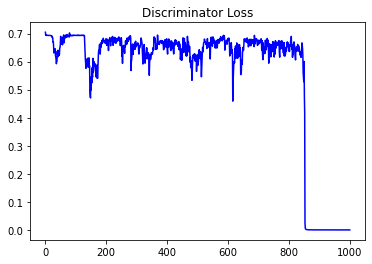

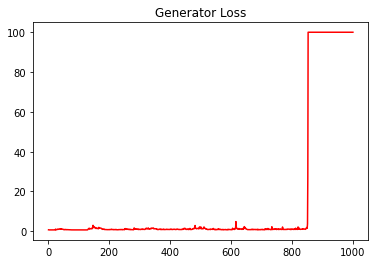

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
115.53235453505165


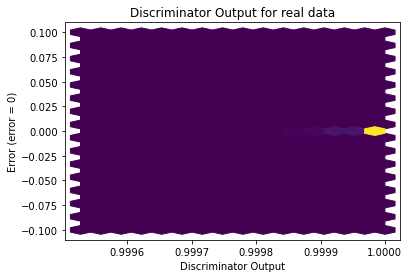

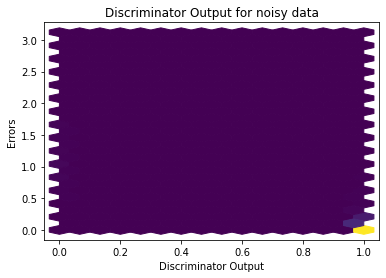

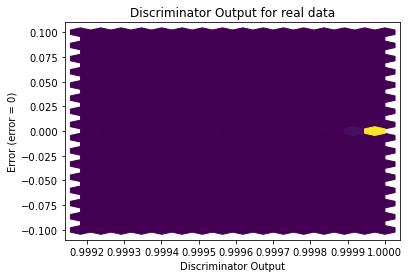

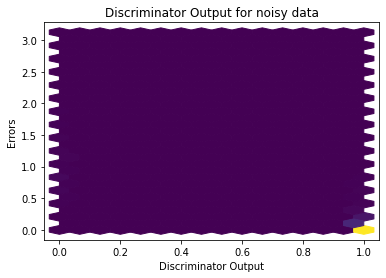

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
# #Generator
# gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc3 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

NameError: name 'disc3' is not defined

In [ ]:
# ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

# print("MAE")
# print(mean(ABC_GAN3_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc3,device)
# sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [ ]:
# #Generator
# gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
# constraints=network.weightConstraint()
# #Discriminator 
# disc4 = network.Discriminator(n_features+1).to(device)

# criterion = torch.nn.BCELoss()
# gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
# disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


In [ ]:
# ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [ ]:
# ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
# sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

# print("MAE")
# print(mean(ABC_GAN4_metrics[1]))

In [ ]:
# sanityChecks.discProbVsError(train_data,disc4,device)
# sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen3.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())

## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [ ]:
# print("Weight of the node at skip connection")
# for name,param in gen4.named_parameters():
#     if(name == "skipNode.weight"):
#         print(param)
#         sb.glue("Skip Connection Weight",param.item())